## <center style="color:red;">**Brain & Blood Analyzer**</center>

### **Diagnostic multimodal par IA : Cancers sanguins & Tumeurs cérébrales via Transfer Learning**

Ce projet combine la détection de tumeurs cérébrales (YOLOv8) et la classification de cellules sanguines cancéreuses (PyTorch) dans une solution unifiée d’analyse d’images médicales par deep learning, visant un diagnostic assisté précis et automatisé.

### <span style="color:green;">**Chargement et vérification des données :**</span>

#### <span style="color:blue;">**1. Importer les librairies nécessaires :**</span>

##### **1.1. PyTorch :**

``PyTorch`` est une bibliothèque Python développée par ``Meta``, utilisée pour faire de l’intelligence artificielle (``IA``) et du deep learning (``DL``).

En d’autres mots, c’est un outil qui permet de :

- Créer des réseaux de neurones (comme les ``CNN``, ``RNN``, ``Transformers``, etc.).

- Entraîner des modèles de Machine Learning / Deep Learning.

- Gérer des tensors (tableaux multidimensionnels très rapides).

- Utiliser le GPU (CUDA) pour accélérer les calculs.

**Comment installer PyTorch ?**

```bash
pip install torch torchvision torchaudio
```

In [1]:
import torch as tr
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile as zpf
import cv2

#### <span style="color:blue;">**2. Chargement des Images et Vérification des Extensions :**</span>

##### **2.1. Définir les chemins pour le fichier ZIP et le dossier de décompression :**

In [2]:
zip_path = "../src/infrastructure/data/Blood/zip/Data_Blood.zip"
extract_path = "../src/infrastructure/data/Blood/extracted"

##### **2.2. Décompresser le ZIP :**

In [3]:
if os.path.exists(zip_path) :
    print(f"Décompression de {zip_path} vers {extract_path} :")
    with zpf.ZipFile(zip_path, 'r') as z :
        if os.path.exists(extract_path) :
            z.extractall(extract_path)
        else :
            print(f"{extract_path} Non Trouvé !")
    print("Décompression Terminée.")
else :
    print(f"{zip_path} Non Trouvé !")

Décompression de ../src/infrastructure/data/Blood/zip/Data_Blood.zip vers ../src/infrastructure/data/Blood/extracted :
Décompression Terminée.


##### **2.3. Trouver toutes les classes :**

In [4]:
def parcourir(path, classes) :
    sub_dirs = []

    for d in os.listdir(path) :
        if os.path.isdir(os.path.join(path, d)) :
            sub_dirs.append(d)
    
    if not sub_dirs:
        dossier_final = os.path.basename(path)
        classes.append(dossier_final)
    else:
        for d in sub_dirs:
            full_path = os.path.join(path, d)
            parcourir(full_path, classes)


In [5]:
classes = []

parcourir(extract_path, classes)

print(classes)

['Benign', 'early Pre-B', 'Pre-B', 'Pro-B']


##### **2.4. Définir les extensions d'image autorisées :**

In [6]:
allowed_extensions = ['jpeg', 'jpg', 'bmp', 'png']

# Listes pour stocker les images et leurs labels
images = []
labels = []

##### **2.5. Parcourir chaque classe et charger les images et Supprimer les fichiers avec extensions non autorisées :**

In [ ]:
for c in classes :
    d = os.listdir(extract_path)[0]
    dir_path = os.path.join(extract_path, d)
    
    d = os.listdir(dir_path)[0]
    dir_path = os.path.join(dir_path, d, c)
    
    for img in os.listdir(dir_path) :
        img_path = os.path.join(dir_path, img)
        
        if os.path.isfile(img_path) :
            img_extension = img.split('.')[1].lower()

            if img_extension in allowed_extensions :
                try :
                    pic = cv2.imread(img_path)
                    if pic is not None :
                        images.append(pic)
                        labels.append(c)
                    else:
                        print(f"Impossible de lire l'image : {img_path}")
                except Exception as e:
                    print(f"Erreur lors de la lecture de {img_path} : {e}")
            else :
                os.remove(img_path)


In [11]:
print(f"- Nombre des Images = {len(images)}")
print(f"- Nombre des Classes = {len(labels)}")

- Nombre des Images = 3242
- Nombre des Classes = 3242


#### <span style="color:blue;">**3. Exploration du Dataset :**</span>

##### **3.1. Identifier les classes (dossiers) présentes dans le dataset :**

In [13]:
print(classes)

['Benign', 'early Pre-B', 'Pre-B', 'Pro-B']


##### **3.2. Compter le nombre d’images par classe :**

In [19]:
images_par_label = {}

for lbl in labels:
    if lbl in images_par_label:
        images_par_label[lbl] += 1
    else:
        images_par_label[lbl] = 1

for classe, nombre in images_par_label.items():
    print(f"- {classe} : {nombre} images")

- Benign : 512 images
- early Pre-B : 979 images
- Pre-B : 955 images
- Pro-B : 796 images


##### **3.3. Montrez un nombre d’échantillons dans chaque classe par countplot :**

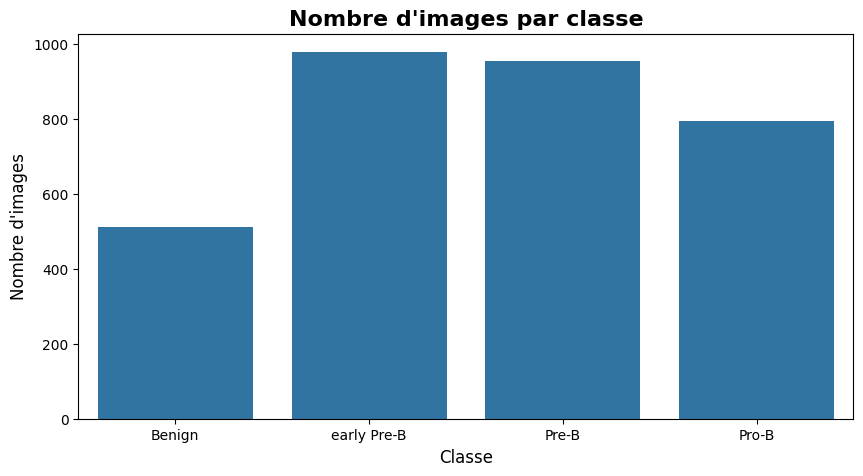

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x=labels)
plt.title("Nombre d'images par classe", fontsize=16, fontweight='bold')
plt.xlabel("Classe", fontsize=12)
plt.ylabel("Nombre d'images", fontsize=12)
plt.show()

##### **3.4. Montrer un échantillon d’images pour chaque classe :**

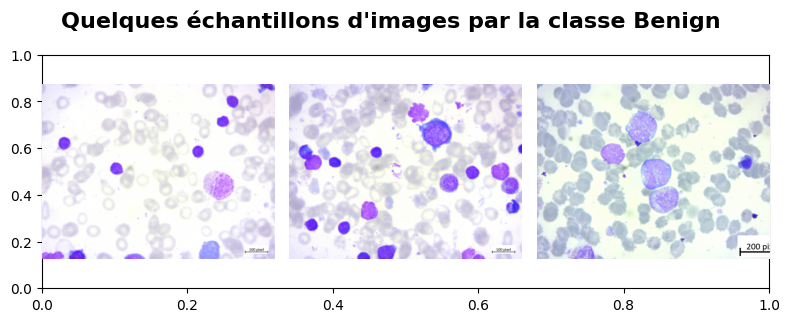

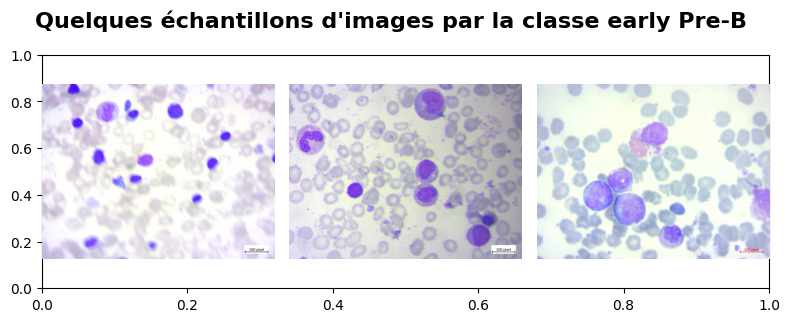

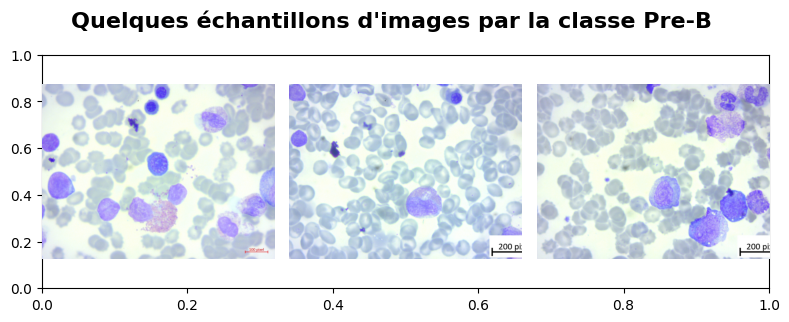

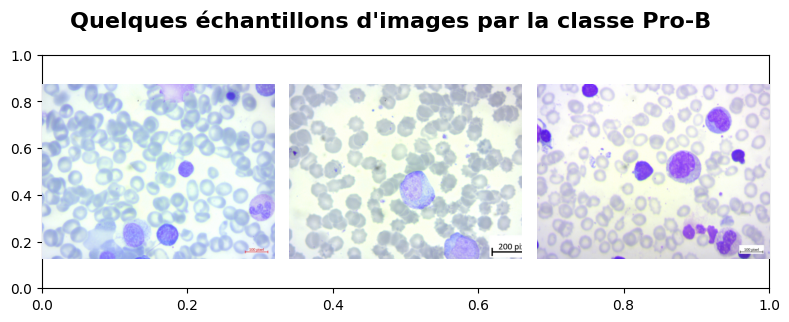

In [21]:
import random

indices = []

for indice, label in enumerate(classes) :
    
    plt.subplots(figsize=(8, 3))

    for idx, lbl in enumerate(labels) :
        if lbl == classes[0] :
            indices.append(idx)
        
    echantillon = random.sample(indices, 3)

    for i, j in enumerate(echantillon) :
        plt.subplot(1, 3, i+1)

        img_rgb = cv2.cvtColor(images[j], cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis("off")

    plt.suptitle(f"Quelques échantillons d'images par la classe {label} ", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

#### <span style="color:blue;">**4. Division des Données :**</span>

##### **4.1. Créer les répertoires correspondants :**

In [24]:
data_dir = Path("../src/infrastructure/data/Blood/dataset")

splits_dir = ["train", "validation", "test"]
for split_dir in splits_dir:
    for c in classes:
        os.makedirs(data_dir / split_dir / c, exist_ok=True)

print("Répértoires Crées avec Succés !")

Répértoires Crées avec Succés !


##### **4.2. Recréer le chemin absolu des images :**

In [ ]:
images_paths = []

for c in classes:
    d = os.listdir(extract_path)[0]
    dir_path = os.path.join(extract_path, d)
    d = os.listdir(dir_path)[0]
    dir_path = os.path.join(dir_path, d, c)

    for img_name in os.listdir(dir_path):
        img_path = os.path.join(dir_path, img_name)

        if os.path.isfile(img_path):
            ext = img_name.split('.')[-1].lower()

            if ext in allowed_extensions:
                images_paths.append(img_path)
            else :
                os.remove(img_path)

In [31]:
len(images_paths)

3242

##### **4.3. Créer un DataFrame pour faciliter le split :**

In [32]:
df = pd.DataFrame({
    "image_path": images_paths,
    "label": labels
})

df.head()

,image_path,label
0,../src/infrastructure/data/Blood/extracted\Blo...,Benign
1,../src/infrastructure/data/Blood/extracted\Blo...,Benign
2,../src/infrastructure/data/Blood/extracted\Blo...,Benign
3,../src/infrastructure/data/Blood/extracted\Blo...,Benign
4,../src/infrastructure/data/Blood/extracted\Blo...,Benign


##### **4.4. Diviser les images en trois ensembles (dossiers) : Train (70%), Validation (15%) et Test (15%) :**

In [39]:
from sklearn.model_selection import train_test_split
import shutil

for c in classes:
    class_df = df[df["label"] == c]
    paths = class_df["image_path"].tolist()

    train_paths, temp_paths = train_test_split(paths, test_size=0.3, random_state=42)
    val_paths, test_paths = train_test_split(temp_paths, test_size=0.5, random_state=42)

    for p in train_paths:
        shutil.copy2(p, data_dir / "train" / c / Path(p).name)
    for p in val_paths:
        shutil.copy2(p, data_dir / "validation" / c / Path(p).name)
    for p in test_paths:
        shutil.copy2(p, data_dir / "test" / c / Path(p).name)

##### **4.5. Vérification du nombre d'images par split :**

In [40]:
for split in splits_dir:
    print(f"\n{split} :")
    for c in classes:
        folder = data_dir / split / c
        count = len(os.listdir(folder))
        print(f" - {c}: {count} images")


train :
 - Benign: 358 images
 - early Pre-B: 685 images
 - Pre-B: 668 images
 - Pro-B: 557 images

validation :
 - Benign: 77 images
 - early Pre-B: 147 images
 - Pre-B: 143 images
 - Pro-B: 119 images

test :
 - Benign: 77 images
 - early Pre-B: 147 images
 - Pre-B: 144 images
 - Pro-B: 120 images


#### <span style="color:blue;">**5. Data Augmentation :**</span>

##### **5.1. Compter les images dans chaque classe pour Training Data :**

In [42]:
train_dir = Path("../src/infrastructure/data/Blood/dataset/train")

classes_counts = {}
for c in os.listdir(train_dir):
    class_path = train_dir / c
    if class_path.is_dir():
        count = len(os.listdir(class_path))
        classes_counts[c] = count


print("\nNombre d'images par classe (avant augmentation) :")
for k, v in classes_counts.items():
    print(f"- {k}: {v}")


Nombre d'images par classe (avant augmentation) :
- Benign: 358
- early Pre-B: 685
- Pre-B: 668
- Pro-B: 557


##### **5.2. Trouver la classe majoritaire :**

In [43]:
max_count = max(classes_counts.values())
print(f"\nClasse majoritaire : {max_count} images")


Classe majoritaire : 685 images


##### **5.3. Définition des Fonctions de transformation :**

In [44]:
def apply_flip(img):
    """Flip horizontal"""
    return cv2.flip(img, 1)

def apply_blur(img):
    """Flou gaussien"""
    return cv2.GaussianBlur(img, (5, 5), 0)

def apply_noise(img):
    """Ajoute du bruit gaussien"""
    noise = np.random.normal(0, 15, img.shape).astype(np.uint8)
    return cv2.add(img, noise)

##### **5.4. Appliquer les transformations pour équilibrer les classes :**

In [50]:
for c in os.listdir(train_dir):
    class_path = train_dir / c
    images_list = list(class_path.glob("*"))
    n_current = len(images_list)
    n_needed = max_count - n_current

    if n_needed <= 0:
        continue

    print(f"\n- Classe {c} : {n_current} images -> ajout de {n_needed} images")

    for i in range(n_needed):
        img_path = random.choice(images_list)
        img = cv2.imread(str(img_path))
    
        if img is None:
            continue

        transform_type = random.choice(["flip", "blur", "noise"])

        if transform_type == "flip":
            aug_img = apply_flip(img)
        elif transform_type == "blur":
            aug_img = apply_blur(img)
        else:
            aug_img = apply_noise(img)

        new_name = f"aug_{i}_{transform_type}.jpg"
        new_path = class_path / new_name

        cv2.imwrite(str(new_path), aug_img)

print("\nAugmentation terminée avec succès !")



- Classe Benign : 358 images -> ajout de 327 images

- Classe Pre-B : 668 images -> ajout de 17 images

- Classe Pro-B : 557 images -> ajout de 128 images

Augmentation terminée avec succès !


##### **5.5.. Recompter les images après augmentation :**

In [51]:
classes_counts_after = {}
for c in os.listdir(train_dir):
    class_path = train_dir / c
    if class_path.is_dir():
        count = len(os.listdir(class_path))
        classes_counts_after[c] = count

print("\nNombre d'images par classe (après augmentation) :")
for k, v in classes_counts_after.items():
    print(f"- {k}: {v}")


Nombre d'images par classe (après augmentation) :
- Benign: 685
- early Pre-B: 685
- Pre-B: 685
- Pro-B: 685
